<h1>Coletar</h1>

In [15]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import tweepy
from datetime import datetime,timedelta
%matplotlib inline

In [16]:
folder_name = ''
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [17]:
df_tweet = pd.read_csv('twitter-archive-enhanced.csv')

In [18]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)



In [19]:
with open('tweet_json.txt', 'w') as file:
    for tweet_id in df_tweet['tweet_id']:
        try:
            tweet_details = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_details._json, file)
            file.write('\n')
        except Exception as e:
            print(tweet_id,e)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 51
754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reac

In [71]:
tweet_data = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [72]:
df_img = pd.read_csv('image-predictions.tsv', sep='\t')


<h1>Avaliar dados</h1>

In [139]:
df_tweet.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [140]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [141]:
df_tweet[df_tweet['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [142]:
df_tweet.expanded_urls.sort_values()

1265    http://goo.gl/ArWZfi,https://twitter.com/dog_r...
444     http://us.blastingnews.com/news/2017/01/200-do...
391     http://us.blastingnews.com/news/2017/01/kentuc...
335     http://us.blastingnews.com/news/2017/02/jfk-an...
204     http://www.gofundme.com/bluethewhitehusky,http...
349     http://www.gofundme.com/bluethewhitehusky,http...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
508     https://m.facebook.com/story.php?story_fbid=18...
754     https://m.youtube.com/watch?v=idKxCMsS3FQ&feat...
35      https://twitter.com/4bonds2carbon/status/88551...
180     https://twitter.com/AaronChewning/status/85706...
568     https://twitter.com/ChinoChinako/status/800065...
332     https://twitter.com/EmilieGambril/status/83276...
298     https://twitter.com/KennyFromDaBlok/status/837...
285     https://twitter.com/KibaDva/status/83890598062...
302     https://twitter.com/SchafeBacon2016/status/836...
269     https://twitter.com/abc/status/841311395547250688
281     https:

In [143]:
df_tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [144]:
df_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [145]:
df_tweet.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [146]:
df_img.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [147]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [148]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [149]:
tweet_data.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38646,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8546,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33126,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6285,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24932,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4165,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42023,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8677,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40181,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9426,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [150]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2344 non-null datetime64[ns]
display_text_range               2344 non-null object
entities                         2344 non-null object
extended_entities                2068 non-null object
favorite_count                   2344 non-null int64
favorited                        2344 non-null bool
full_text                        2344 non-null object
geo                              0 non-null float64
id                               2344 non-null int64
id_str                           2344 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [151]:
tweet_data[tweet_data['retweeted_status'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,NaN,NaN,NaN,NaN,18611,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,6866,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1300,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6679,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,NaN,NaN,NaN,NaN,81,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,NaN,NaN,2017-06-13 01:14:41,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,NaN,...,NaN,NaN,NaN,NaN,14872,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
95,NaN,NaN,2017-06-10 00:35:19,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,NaN,...,NaN,NaN,NaN,NaN,1601,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
99,NaN,NaN,2017-06-08 04:17:07,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @loganamnosis: Penelope here is doing me qu...,NaN,...,NaN,NaN,NaN,NaN,28,False,{'created_at': 'Thu Jun 08 03:32:35 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
107,NaN,NaN,2017-06-04 00:46:17,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Dawn. She's just checki...,NaN,...,NaN,NaN,NaN,NaN,5773,False,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [152]:
tweet_data[tweet_data.retweeted_status.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,NaN,NaN,NaN,NaN,18611,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,6866,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1300,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6679,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,NaN,NaN,NaN,NaN,81,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,NaN,NaN,2017-06-13 01:14:41,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,NaN,...,NaN,NaN,NaN,NaN,14872,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
95,NaN,NaN,2017-06-10 00:35:19,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,NaN,...,NaN,NaN,NaN,NaN,1601,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
99,NaN,NaN,2017-06-08 04:17:07,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @loganamnosis: Penelope here is doing me qu...,NaN,...,NaN,NaN,NaN,NaN,28,False,{'created_at': 'Thu Jun 08 03:32:35 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
107,NaN,NaN,2017-06-04 00:46:17,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Dawn. She's just checki...,NaN,...,NaN,NaN,NaN,NaN,5773,False,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [153]:
tweet_data.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2344.000000,0.0,2.344000e+03,2.344000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2206.0,2206.0,2.500000e+01,2.500000e+01,2344.000000
mean,NaN,NaN,8033.213311,NaN,7.422890e+17,7.422890e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.169687e+17,8.169687e+17,3008.267491
std,NaN,NaN,12091.447802,NaN,6.835057e+16,6.835057e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,5.734278e+16,5.734278e+16,5005.082054
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,7.061659e+17,7.061659e+17,0.000000
25%,NaN,NaN,1399.750000,NaN,6.783704e+17,6.783704e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,602.750000
50%,NaN,NaN,3522.000000,NaN,7.187854e+17,7.187854e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.322683e+17,8.322683e+17,1401.000000
75%,NaN,NaN,9929.250000,NaN,7.986989e+17,7.986989e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3500.500000
max,NaN,NaN,142764.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,76969.000000


<h2>df_tweet</h2>
<h3>Problemas de qualidade</h3>

- Remover retweets da tabela
- Mudar os nomes incorretos da coluna 'name'
- 181 ids de retweet que devem ser removidos
- Dados sujos na coluna 'source'
- 'timestamp' armazenado como string
- Remover twittes com o nome 'None'
-  Converter 'tweet_id' para o tipo string

<h3>Problemas de arrumação</h3>

-  Juntas as colunas 'doggo', 'floofer', 'pupper' e 'puppo'
- Excluir colunas que não serão utilizadas






<h2>tweet_data</h2>

<h3>Problemas de qualidade</h3>

-  Renomear a coluna 'id' para 'tweet_id' 
-  170 ids de retweet que devem ser removidos
-  Converter 'tweet_id' para o tipo string

<h3>Problemas de arrumação</h3>

-  Excluir colunas que não serão utilizadas


<h2>df_img</h2>

<h3>Problema de qualidade</h3>

-  Converter 'tweet_id' para o tipo string

<h2>Todos dataframe</h2>

- Juntar todos os dataframes em um só

<h1>Limpeza</h1>

In [154]:
df_tweet_clean = df_tweet.copy()
df_img_clean = df_img.copy()
tweet_data_clean = tweet_data.copy()

<h3>df_tweet DATAFRAME</h3>
<h4>Definir</h4>
- 181 ids de retweet que devem ser removidos
<h4>Código</h4>

In [155]:
df_tweet_clean = df_tweet_clean[df_tweet_clean['retweeted_status_id'].isnull()]

<h4>Teste</h4>

In [156]:
df_tweet_clean[df_tweet_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<h4>Definir</h4>
- Mudar os nomes incorretos da coluna 'name'
<h4>Código</h4>

In [157]:
invalid_name = ["the",
"light",
"life",
"an",
"a",
"by",
"actually",
"just",
"getting",
"infuriating",
"old",
"all",
"this",
"very",
"mad",
"not",
"one",
"my",
"O",
"his",
"quite",
"such",
"Alf",
"officially",
"unacceptable",]

In [158]:
for dog_name in df_tweet_clean['name']:
    for name in invalid_name:
        if dog_name == name:
            df_tweet_clean['name'].replace(name,'None', inplace=True) 

<h4>Teste</h4>

In [159]:
df_tweet_clean.name.value_counts()

None          784
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Tucker          9
Penny           9
Sadie           8
Lola            8
Winston         8
Daisy           7
Toby            7
Stanley         6
Bo              6
Bella           6
Jax             6
Oscar           6
Bailey          6
Koda            6
Dave            5
Scout           5
Rusty           5
Buddy           5
Chester         5
Louis           5
Leo             5
Bentley         5
Milo            5
Dexter          4
Cassie          4
             ... 
Tommy           1
Luther          1
Koko            1
Butters         1
Tess            1
Henry           1
Pherb           1
Stark           1
Dewey           1
Timmy           1
Nico            1
Chevy           1
Samsom          1
Apollo          1
Brian           1
Jeremy          1
Eazy            1
Lambeau         1
incredibly      1
Kramer          1
Carbon          1
Rilo            1
Grizz           1
Jordy           1
Rorie     

<h4>Definir</h4>
- Remover twittes sem imagens
<h4>Código</h4>

In [160]:
df_tweet_clean = df_tweet_clean[df_tweet_clean.expanded_urls.notnull()]

<h4>Teste</h4>

In [161]:
df_tweet_clean[df_tweet_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<h4>Definir</h4>
- Limpar dados da coluna 'source'
<h4>Código</h4>

In [162]:
df_tweet_clean['source'] = df_tweet_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_tweet_clean['source'] = df_tweet_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_tweet_clean['source'] = df_tweet_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_tweet_clean['source'] = df_tweet_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

<h4>Teste</h4>

In [163]:
df_tweet_clean.source.value_counts()

Twitter for iPhone    1985
Vine                    91
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

<h4>Definir</h4>
- Converter o tipo de dados da coluna timestamp string para date
<h4>Código</h4>

In [164]:
df_tweet_clean['timestamp'] = pd.to_datetime(df_tweet_clean['timestamp'])

<h4>Teste</h4>

In [165]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns](1), flo

<h4>Definir</h4>
- Converter 'tweet_id' para o tipo string
<h4>Código</h4>

In [166]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

<h4>Teste</h4>

In [167]:
type(df_tweet_clean.tweet_id.iloc[0])

str

<h4>Definir</h4>
- Juntas as colunas 'doggo', 'floofer', 'pupper' e 'puppo'
<h4>Código</h4>

In [168]:
df_tweet_clean['stage'] = df_tweet_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

<h4>Teste</h4>

In [169]:
df_tweet_clean.stage.value_counts()

pupper     242
doggo       81
puppo       29
floofer      4
Name: stage, dtype: int64

<h4>Definir</h4>
- Excluir colunas que não serão utilizadas
<h4>Código</h4>

In [170]:
columns = [    'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'doggo',
               'floofer',
               'pupper',
               'puppo']

In [171]:
df_tweet_clean.drop(columns, axis=1, inplace=True)

<h4>Teste</h4>

In [172]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
stage                 356 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 148.9+ KB


<h4>Definir</h4>
- Remover twittes com o nome 'None'
<h4>Código</h4>

In [173]:
df_tweet_clean = df_tweet_clean[df_tweet_clean.name != "None" ]

<h4>Teste</h4>

In [174]:
df_tweet_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Stanley        6
Koda           6
Bella          6
Jax            6
Oscar          6
Bailey         6
Bo             6
Leo            5
Scout          5
Chester        5
Buddy          5
Louis          5
Milo           5
Bentley        5
Dave           5
Rusty          5
Boomer         4
Alfie          4
Oakley         4
              ..
Tommy          1
Luther         1
Koko           1
Butters        1
Tess           1
Henry          1
Pherb          1
Stark          1
Dewey          1
Timmy          1
Nico           1
Chevy          1
Samsom         1
Apollo         1
Brian          1
Jeremy         1
Eazy           1
Lambeau        1
incredibly     1
Kramer         1
Carbon         1
Rilo           1
Grizz          1
Jordy          1
Rorie          1
Harlso         1
Dobby          1
Mimosa        

<h3>tweet_data DATAFRAME</h3>
<h4>Definir</h4>
- Renomear a coluna 'id' para 'tweet_id' 
<h4>Código</h4>

In [175]:
tweet_data_clean.rename({'id':'tweet_id'}, axis=1, inplace=True)

<h4>Teste</h4>

In [176]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2344 non-null datetime64[ns]
display_text_range               2344 non-null object
entities                         2344 non-null object
extended_entities                2068 non-null object
favorite_count                   2344 non-null int64
favorited                        2344 non-null bool
full_text                        2344 non-null object
geo                              0 non-null float64
tweet_id                         2344 non-null int64
id_str                           2344 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

<h4>Definir</h4>
- Remover os retweets da tabela
<h4>Código</h4>

In [177]:
tweet_data_clean = tweet_data_clean[tweet_data_clean.retweeted_status.isnull()]

<h4>Teste</h4>

In [178]:
tweet_data_clean[tweet_data_clean.retweeted_status.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


<h4>Definir</h4>
- Excluir colunas que não serão utilizadas
<h4>Código</h4>

In [179]:
columns_tweet = ['contributors',
           'coordinates',
           'created_at',
           'display_text_range',
           'entities',
           'extended_entities',
           'favorited',
           'full_text',
           'geo',
           'id_str',
           'in_reply_to_screen_name',
           'in_reply_to_status_id',
           'in_reply_to_status_id_str',
           'in_reply_to_user_id',
           'in_reply_to_user_id_str',
           'is_quote_status',
           'lang',
           'place','possibly_sensitive',
           'possibly_sensitive_appealable',
           'quoted_status',
           'quoted_status_id',
           'quoted_status_id_str',
           'quoted_status_permalink',
           'retweeted',
           'retweeted_status',
           'source',
           'truncated',
           'user']

In [180]:
tweet_data_clean.drop(columns_tweet, axis=1, inplace=True)

<h4>Teste</h4>

In [181]:
tweet_data_clean.head()

,favorite_count,tweet_id,retweet_count
0,38646,892420643555336193,8546
1,33126,892177421306343426,6285
2,24932,891815181378084864,4165
3,42023,891689557279858688,8677
4,40181,891327558926688256,9426


<h4>Definir</h4>
- Converter 'tweet_id' para o tipo string
<h4>Código</h4>

In [182]:
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype(str)

<h4>Teste</h4>

In [183]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2343
Data columns (total 3 columns):
favorite_count    2174 non-null int64
tweet_id          2174 non-null object
retweet_count     2174 non-null int64
dtypes: int64(2), object(1)
memory usage: 67.9+ KB


<h3>df_img DATAFRAME</h3>
<h4>Definir</h4>
- Converter 'tweet_id' para o tipo string 
<h4>Código</h4>

In [184]:
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)

<h4>Teste</h4>

In [185]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<h3>Todos DATAFRAME</h3>
<h4>Definir</h4>
- Juntar os dataframes
<h4>Código</h4>

In [186]:
df_merge = pd.merge(df_tweet_clean, tweet_data_clean,on='tweet_id', how='inner')

In [187]:
df_merge = pd.merge(df_merge, df_img_clean,on='tweet_id', how='inner')

<h4>Teste</h4>

In [188]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1348
Data columns (total 21 columns):
tweet_id              1349 non-null object
timestamp             1349 non-null datetime64[ns]
source                1349 non-null object
text                  1349 non-null object
rating_numerator      1349 non-null int64
rating_denominator    1349 non-null int64
name                  1349 non-null object
stage                 181 non-null object
favorite_count        1349 non-null int64
retweet_count         1349 non-null int64
jpg_url               1349 non-null object
img_num               1349 non-null int64
p1                    1349 non-null object
p1_conf               1349 non-null float64
p1_dog                1349 non-null bool
p2                    1349 non-null object
p2_conf               1349 non-null float64
p2_dog                1349 non-null bool
p3                    1349 non-null object
p3_conf               1349 non-null float64
p3_dog                1349 non-n

<h1>Armazenar, Analisar e Visualizar</h1>
<h2>Armazenar</h2>

In [189]:
folder_name = 'Documentos_master'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

df_merge.to_csv('Documentos_master/twitter_archive_master.csv')
df_tweet_clean.to_csv('Documentos_master/df_tweet_master.csv')
df_img_clean.to_csv('Documentos_master/image_prediction_master.csv')
tweet_data_clean.to_csv('Documentos_master/tweet_json_master.csv')

<h2>Analisar</h2>

In [190]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1348
Data columns (total 21 columns):
tweet_id              1349 non-null object
timestamp             1349 non-null datetime64[ns]
source                1349 non-null object
text                  1349 non-null object
rating_numerator      1349 non-null int64
rating_denominator    1349 non-null int64
name                  1349 non-null object
stage                 181 non-null object
favorite_count        1349 non-null int64
retweet_count         1349 non-null int64
jpg_url               1349 non-null object
img_num               1349 non-null int64
p1                    1349 non-null object
p1_conf               1349 non-null float64
p1_dog                1349 non-null bool
p2                    1349 non-null object
p2_conf               1349 non-null float64
p2_dog                1349 non-null bool
p3                    1349 non-null object
p3_conf               1349 non-null float64
p3_dog                1349 non-n

In [191]:
df_merge.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1.349000e+03,1.349000e+03
mean,12.112676,10.028169,9271.296516,2675.002224,1.210526,0.600649,1.334239e-01,6.040856e-02
std,48.145650,1.092505,11913.797123,3972.788577,0.574050,0.274655,1.007190e-01,5.165782e-02
min,2.000000,7.000000,105.000000,21.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2302.000000,679.000000,1.000000,0.363272,5.097100e-02,1.540050e-02
50%,11.000000,10.000000,4743.000000,1491.000000,1.000000,0.599660,1.174020e-01,4.921790e-02
75%,12.000000,10.000000,12025.000000,3245.000000,1.000000,0.868658,1.967690e-01,9.394400e-02
max,1776.000000,50.000000,123894.000000,60765.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [192]:
df_merge[df_merge.favorite_count == 123894]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
86,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,pupper,123894,36211,...,2,French_bulldog,0.905334,True,Boston_bull,0.07806,True,pug,0.001771,True


Jemesy foi o cachorro que recebeu o maior número de favoritos

In [193]:
df_merge.name.value_counts()

Lucy          10
Charlie       10
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Toby           7
Lola           7
Daisy          7
Bo             6
Stanley        6
Koda           6
Jax            6
Bella          6
Louis          5
Rusty          5
Milo           5
Buddy          5
Scout          5
Oscar          5
Bailey         5
Dave           5
Chester        5
Leo            5
Derek          4
Gary           4
Larry          4
Maggie         4
              ..
Cilantro       1
Bookstore      1
Tommy          1
Luther         1
Koko           1
Kramer         1
Genevieve      1
Maddie         1
Lambeau        1
Fillup         1
Timmy          1
Nico           1
Chevy          1
Samsom         1
Apollo         1
Brian          1
Jeremy         1
Eazy           1
Dewey          1
Mimosa         1
incredibly     1
Carbon         1
Rilo           1
Grizz          1
Jordy          1
Rorie          1
Harlso         1
Blitz         

os nomes de cachorros que mais repetiram foi Charlie, Lucy, Cooper e Oliver.

In [194]:
df_merge[df_merge.retweet_count == 60765]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
317,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,122510,60765,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


Stephan foi o cachorro que ganhou o maior número de retweets

In [195]:
df_merge[df_merge.rating_numerator == 1776]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
574,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,Atticus,NaN,5493,2697,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


Atticus o cachorro mais fofo com uma avaliação de 1776/10!!

<h2>Visualizar</h2>

In [196]:
df_counts = df_merge[['timestamp','favorite_count','retweet_count']].copy()

In [197]:
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1348
Data columns (total 3 columns):
timestamp         1349 non-null datetime64[ns]
favorite_count    1349 non-null int64
retweet_count     1349 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 42.2 KB


In [198]:
df_counts.set_index('timestamp', inplace=True)

Text(0.5,1,'Número de favoritos por tempo')

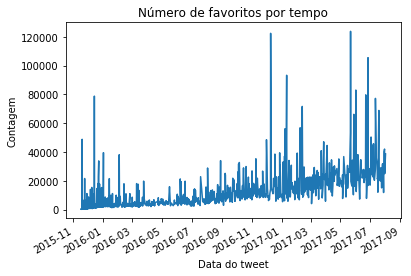

In [199]:
df_counts['favorite_count'].plot( label='favorite')
plt.xlabel('Data do tweet')
plt.ylabel('Contagem')
plt.title('Número de favoritos por tempo')

Text(0.5,1,'Número de retweet por tempo')

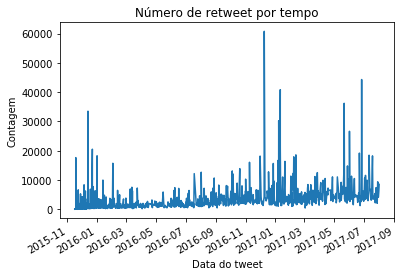

In [200]:
df_counts['retweet_count'].plot( label='retweet')
plt.xlabel('Data do tweet')
plt.ylabel('Contagem')
plt.title('Número de retweet por tempo')

<h2>Referências</h2>


http://docs.tweepy.org/en/v3.5.0/getting_started.html

https://twittercommunity.com/t/understanding-twitter-api-rate-limits/38534


https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
